## **라이브러리**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## **데이터 로드**

In [2]:
data = pd.read_csv('./train.csv')
building_info = pd.read_csv('./building_info.csv')

In [3]:
data

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [4]:
building_info

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


In [5]:
le = LabelEncoder()
building_info['건물유형'] = le.fit_transform(building_info['건물유형'])


## **데이터 구조 확인**

In [6]:
print(data.head())

print(data.info())  # 데이터 요약 정보

print(data.describe())  # 데이터 통계 요약

   num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      NaN      0.9   42.0     NaN   
1  1_20220601 01     1  20220601 01   18.0      NaN      1.1   45.0     NaN   
2  1_20220601 02     1  20220601 02   17.7      NaN      1.5   45.0     NaN   
3  1_20220601 03     1  20220601 03   16.7      NaN      1.4   48.0     NaN   
4  1_20220601 04     1  20220601 04   18.4      NaN      2.8   43.0     NaN   

   일사(MJ/m2)  전력소비량(kWh)  
0        NaN     1085.28  
1        NaN     1047.36  
2        NaN      974.88  
3        NaN      953.76  
4        NaN      986.40  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 

## **각 열과 전기소비량의 산포**

In [7]:
# Convert '일시' to a datetime object for better plotting if needed
data['일시'] = pd.to_datetime(data['일시'], format='%Y%m%d %H')

# List of columns to check correlation with '전력소비량(kWh)'
columns_to_check = ['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)']

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(columns_to_check), 1, figsize=(10, 30))

# Plot each feature against '전력소비량(kWh)'
for i, column in enumerate(columns_to_check):
    sns.scatterplot(data=data, x=column, y='전력소비량(kWh)', ax=axs[i])
    axs[i].set_title(f'{column} vs 전력소비량(kWh)')

plt.tight_layout()
plt.show()


/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2447932859.py:15: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2447932859.py:15: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2447932859.py:15: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2447932859.py:15: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2447932859.py:15: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2447932859.py:15: UserWar

## **각 열의 상관관계**

/Users/jintaewan/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/Users/jintaewan/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
/Users/jintaewan/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
/Users/jintaewan/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/Users/jintaewan/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
/Users/jintaewan/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUN

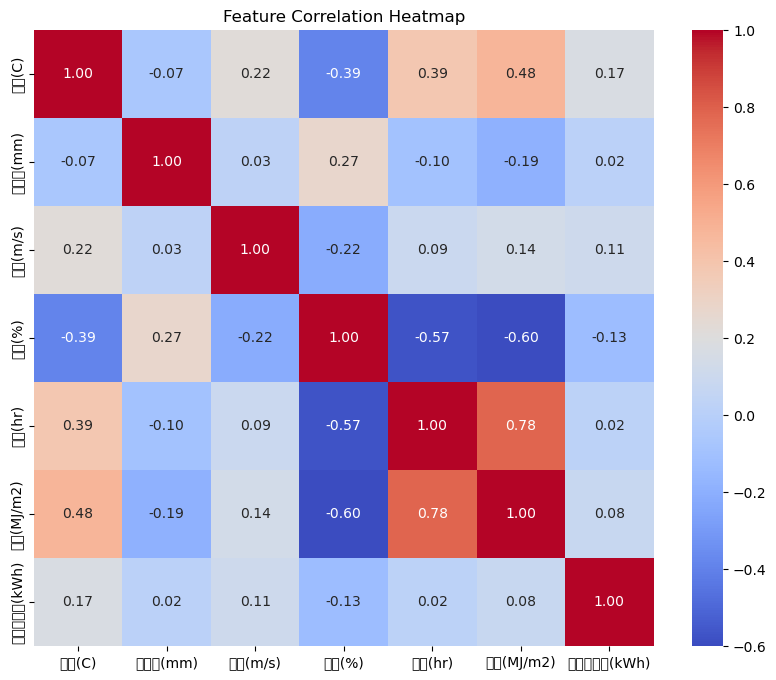

In [8]:
# 상관관계 히트맵을 그리기 위해 필요한 열만 선택
columns_of_interest = ['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)']
correlation_matrix = data[columns_of_interest].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## **결측치 확인**

In [9]:
missing_values = data.isnull().sum()
print(missing_values)

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
dtype: int64


## **일시를 년, 월, 일로 분리**

In [10]:
data['일시'] = pd.to_datetime(data['일시'], format='%Y%m%d %H')

# 년, 월, 일, 시간으로 분리
data['년'] = data['일시'].dt.year
data['월'] = data['일시'].dt.month
data['일'] = data['일시'].dt.day
data['시간'] = data['일시'].dt.hour

# 불필요한 열 제거
data.drop(columns=['num_date_time', '일시'], inplace=True)

# 전처리된 데이터 확인
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   건물번호        204000 non-null  int64  
 1   기온(C)       204000 non-null  float64
 2   강수량(mm)     43931 non-null   float64
 3   풍속(m/s)     203981 non-null  float64
 4   습도(%)       203991 non-null  float64
 5   일조(hr)      128818 non-null  float64
 6   일사(MJ/m2)   116087 non-null  float64
 7   전력소비량(kWh)  204000 non-null  float64
 8   년           204000 non-null  int64  
 9   월           204000 non-null  int64  
 10  일           204000 non-null  int64  
 11  시간          204000 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 18.7 MB


,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),년,월,일,시간
0,1,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,2022,6,1,0
1,1,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,2022,6,1,1
2,1,17.7,NaN,1.5,45.0,NaN,NaN,974.88,2022,6,1,2
3,1,16.7,NaN,1.4,48.0,NaN,NaN,953.76,2022,6,1,3
4,1,18.4,NaN,2.8,43.0,NaN,NaN,986.40,2022,6,1,4


## **결측치 제거**

In [11]:
data['강수량(mm)'].fillna(data['강수량(mm)'].mean(), inplace=True)
data['풍속(m/s)'].fillna(data['풍속(m/s)'].mean(), inplace=True)
data['습도(%)'].fillna(data['습도(%)'].mean(), inplace=True)
data['일조(hr)'].fillna(data['일조(hr)'].mean(), inplace=True)
data['일사(MJ/m2)'].fillna(data['일사(MJ/m2)'].mean(), inplace=True)

---

## **건물정보 데이터**

In [12]:
grouped_data = data.groupby('건물번호')['전력소비량(kWh)'].median().reset_index()

# Merge the grouped_data with building_info to add the '평균전기사용량' column
building_info_with_avg = pd.merge(building_info, grouped_data, on='건물번호')

# Rename the '전력소비량(kWh)' column to '평균전기사용량'
building_info_with_avg.rename(columns={'전력소비량(kWh)': '평균전기사용량'}, inplace=True)


In [13]:
building_info

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,0,110634.00,39570.00,-,-,-
1,2,0,122233.47,99000.00,-,-,-
2,3,0,171243.00,113950.00,40,-,-
3,4,0,74312.98,34419.62,60,-,-
4,5,0,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,11,93314.00,60500.00,-,-,-
96,97,11,55144.67,25880.00,-,-,-
97,98,11,53578.62,17373.75,-,-,-
98,99,11,53499.00,40636.00,-,-,-


In [14]:
building_info_with_avg

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),평균전기사용량
0,1,0,110634.00,39570.00,-,-,-,2460.72
1,2,0,122233.47,99000.00,-,-,-,1395.36
2,3,0,171243.00,113950.00,40,-,-,1224.00
3,4,0,74312.98,34419.62,60,-,-,885.96
4,5,0,205884.00,150000.00,-,2557,1000,1965.60
...,...,...,...,...,...,...,...,...
95,96,11,93314.00,60500.00,-,-,-,2796.18
96,97,11,55144.67,25880.00,-,-,-,1220.58
97,98,11,53578.62,17373.75,-,-,-,1195.29
98,99,11,53499.00,40636.00,-,-,-,1189.08


/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2741276558.py:17: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2741276558.py:17: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2741276558.py:17: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2741276558.py:17: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2741276558.py:17: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
/var/folders/kr/fgbdxp1s36j5dsr37lwbcbj00000gn/T/ipykernel_49384/2741276558.py:17: Use

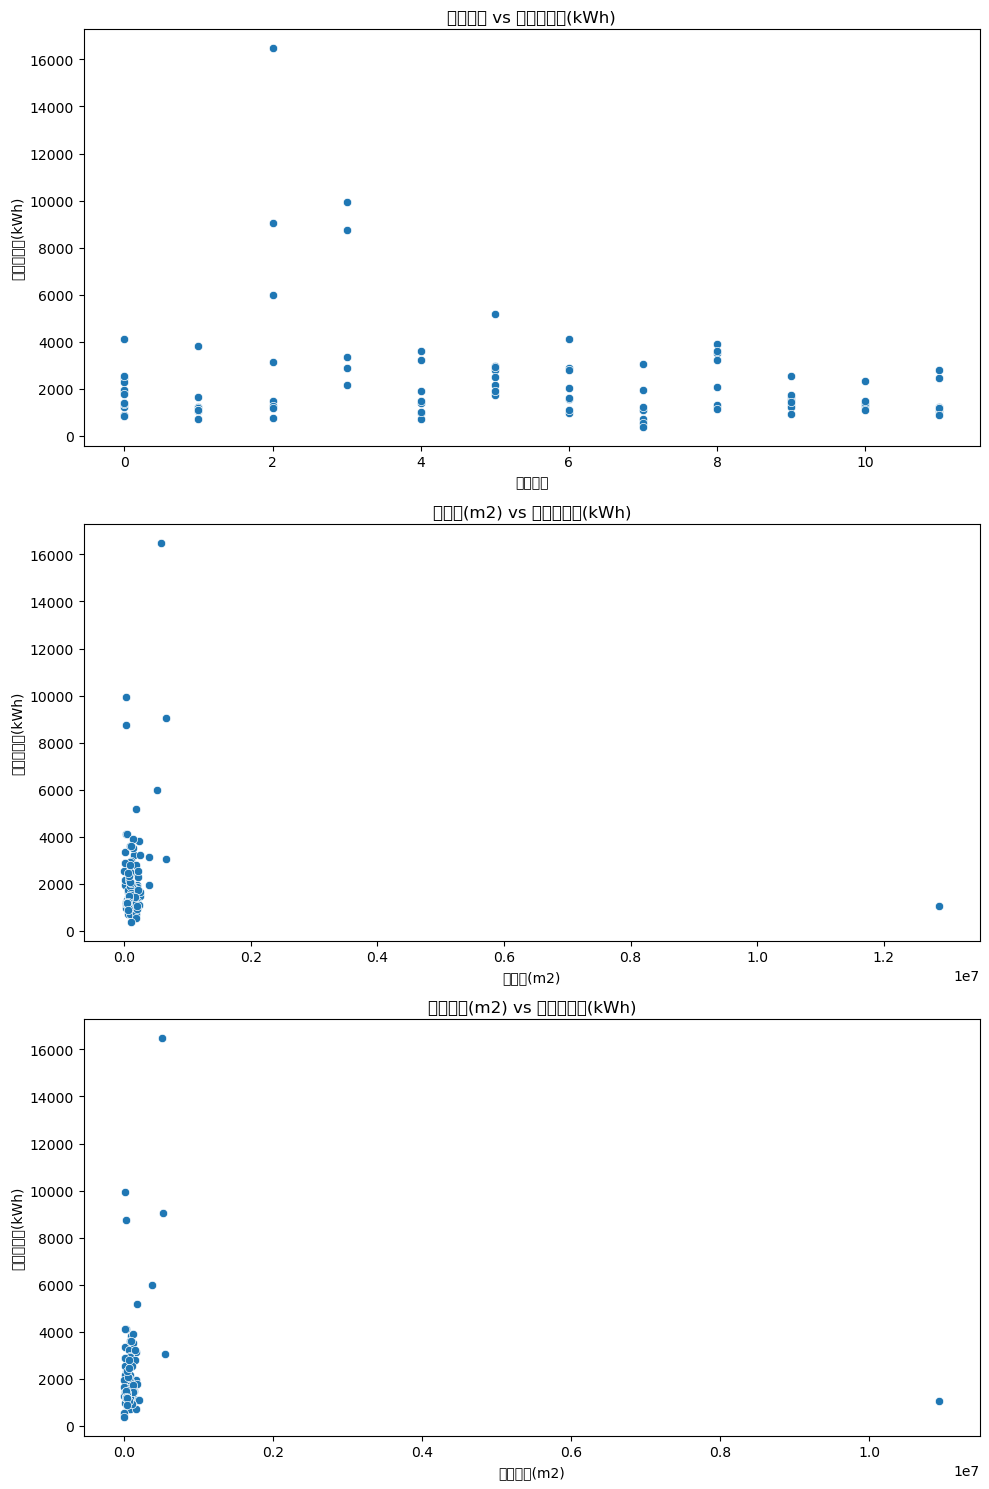

In [15]:
# Merge the building_info with grouped_data on '건물번호'
merged_data = pd.merge(grouped_data, building_info, on='건물번호')

# Columns of interest for plotting
columns_of_interest_building = ['건물유형', '연면적(m2)', '냉방면적(m2)']

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(columns_of_interest_building), 1, figsize=(10, 15))

# Plot each feature against '전력소비량(kWh)' with smaller points
for i, column in enumerate(columns_of_interest_building):
    sns.scatterplot(data=merged_data, x=column, y='전력소비량(kWh)', ax=axs[i])
    axs[i].set_title(f'{column} vs 전력소비량(kWh)')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('전력소비량(kWh)')

plt.tight_layout()
plt.show()

In [16]:
# 데이터 합치기 (train과 building_info)
data = data.merge(building_info, on='건물번호', how='left')
data=data.drop(columns=['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'])


In [17]:
data

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),년,월,일,시간,건물유형,연면적(m2),냉방면적(m2)
0,1,18.6,2.04083,0.9,42.0,0.333637,1.063823,1085.28,2022,6,1,0,0,110634.00,39570.00
1,1,18.0,2.04083,1.1,45.0,0.333637,1.063823,1047.36,2022,6,1,1,0,110634.00,39570.00
2,1,17.7,2.04083,1.5,45.0,0.333637,1.063823,974.88,2022,6,1,2,0,110634.00,39570.00
3,1,16.7,2.04083,1.4,48.0,0.333637,1.063823,953.76,2022,6,1,3,0,110634.00,39570.00
4,1,18.4,2.04083,2.8,43.0,0.333637,1.063823,986.40,2022,6,1,4,0,110634.00,39570.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,2.04083,0.9,86.0,0.500000,1.063823,881.04,2022,8,24,19,11,57497.84,40035.23
203996,100,22.4,2.04083,1.3,86.0,0.000000,1.063823,798.96,2022,8,24,20,11,57497.84,40035.23
203997,100,21.3,2.04083,1.0,92.0,0.333637,1.063823,825.12,2022,8,24,21,11,57497.84,40035.23
203998,100,21.0,2.04083,0.3,94.0,0.333637,1.063823,640.08,2022,8,24,22,11,57497.84,40035.23


## **불필요한 데이터 제거**

In [18]:
data=data.drop(columns=['일조(hr)','일사(MJ/m2)'])

In [19]:
data.to_csv('./data.csv', index=False)

## **학습데이터 생성**

In [20]:
# 입력 변수(X)와 출력 변수(y) 분리
X = data.drop(columns=['전력소비량(kWh)'])
y = data['전력소비량(kWh)']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **랜덤 포레스트(학습데이터로 모델 학습)**

In [21]:
# 모델 선택 및 학습 (랜덤 포레스트 회귀 모델)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 145.86026659317474


---

## **test데이터 전처리**

In [22]:
test = pd.read_csv('./test.csv')
missing_values = test.isnull().sum()
print(missing_values)

num_date_time    0
건물번호             0
일시               0
기온(C)            0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
dtype: int64


In [23]:
test['일시'] = pd.to_datetime(test['일시'], format='%Y%m%d %H')

# 년, 월, 일, 시간으로 분리
test['년'] = test['일시'].dt.year
test['월'] = test['일시'].dt.month
test['일'] = test['일시'].dt.day
test['시간'] = test['일시'].dt.hour

# 불필요한 열 제거
test.drop(columns=['num_date_time', '일시'], inplace=True)


In [24]:
test = test.merge(building_info, on='건물번호', how='left')

test=test.drop(columns=['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'])


---

## **test데이터 예측하기**

In [25]:
y_pred = model.predict(test)

In [26]:
submission = pd.read_csv('./sample_submission.csv')
submission['answer'] = y_pred

# submission 파일 저장
submission_output_path = './sample_submission.csv'
submission.to_csv(submission_output_path, index=False)


In [27]:
params = {
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 모델 생성
model = RandomForestRegressor(random_state=42)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

ValueError: Found input variables with inconsistent numbers of samples: [40800, 16800]